## PROBLEM 1

In [3]:
#Problem 1a
from scipy.stats import binom
k1 = 12.1; k2 = 9.9; n = 22; p = 0.41
probabilitya = binom.cdf(k1, n, p)-binom.cdf(k2, n, p)
probabilitya

0.3460752138298484

In [5]:
#Problem 1ba
k = 1; n=50000; p = 0.00001
probabilityb=binom.pmf(k, n, p)
probabilityb

0.303267604364929

In [217]:
#Problem 1bb
from scipy.stats import poisson
from scipy.optimize import fsolve

p= 1/100000

def equation(n):
    lam=n*p
    problessthan19 = poisson.cdf(19, lam)
    return problessthan19 - 0.05 #solves by running until problessthan19 is equal to 0.05 so that 0.05-0.05 = 0

initial_guess = 2000000

popneeded = fsolve(equation, initial_guess)
popneeded

array([2787923.96394435])

In [11]:
#Problem 1c
from scipy.stats import nbinom
import matplotlib.pyplot as plt
k = 452000; n = 48000; p = 0.10
problessthan500 = nbinom.cdf(k, n, p)
problessthan500

1.0

Text(0.5, 1.0, 'CDF Comparisons of Probability of Genome Injections')

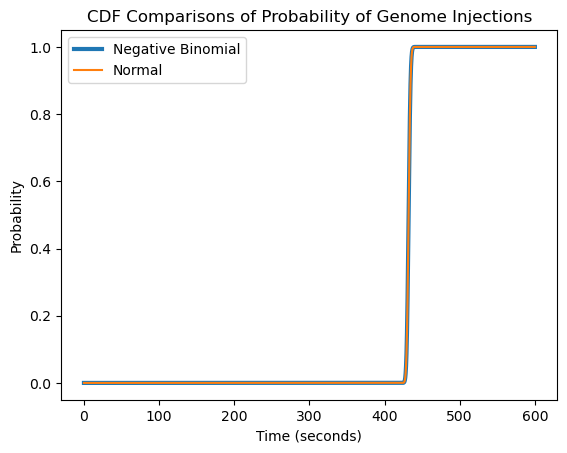

In [14]:
#problem1c graph
import numpy as np
from scipy.stats import norm
trial = np.arange(0, 600000)
dist = nbinom.cdf(trial, n, p)

mean = (n*(1-p))/(p)
variance = (n*(1-p))/((p)**2)
standarddev = np.sqrt(variance)
normalapprox = norm.cdf(trial, mean, standarddev)

plt.plot(trial/1000, dist, linewidth = 3)
plt.plot(trial/1000, normalapprox)
plt.xlabel("Time (seconds)")
plt.ylabel("Probability")
plt.legend(["Negative Binomial", "Normal"])
plt.title("CDF Comparisons of Probability of Genome Injections")

## PROBLEM 2

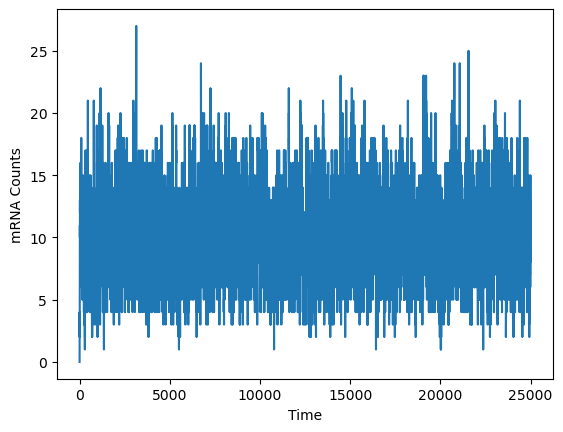

In [15]:
#Problem 2
import numpy as np
import matplotlib.pyplot as plt

alpha = 1
beta = 0.1
steps = 50000

counter_mRNA = 0
counter_time = 0

time_points = []
mRNA_points = []
time_in_btw = []

for step in range(steps):
    transcription_rate = alpha
    degradation_rate = beta*counter_mRNA
    total_rate = transcription_rate + degradation_rate
    
    time_btw = -np.log(np.random.random())/total_rate
    time_in_btw.append(time_btw)
    counter_time += time_btw
    time_points.append(counter_time)
    mRNA_points.append(counter_mRNA)
    
    probability_transcription = transcription_rate/total_rate
    probaility_degradation = degradation_rate/total_rate
    
    random_num = np.random.random()
    
    if random_num < probability_transcription:
        counter_mRNA += 1
    else:
        counter_mRNA -= 1
        
plt.plot(time_points, mRNA_points)
plt.xlabel("Time")
plt.ylabel("mRNA Counts")

#mean is total count / total time except total count is also defined by time spent at that count 
#therefore total count is each total sum of each count * time spent at that count
#divide by last time point minus the 500th 
mean = (np.sum(np.array(mRNA_points[500:])*np.array(time_in_btw[500:]))/(time_points[-1]-time_points[500]))
variance = (np.sum(((np.array(mRNA_points[500:])-mean)**2)*np.array(time_in_btw[500:]))/(time_points[-1]-time_points[500]))

# PROBLEM 3

Text(0, 0.5, 'Posterior Probability')

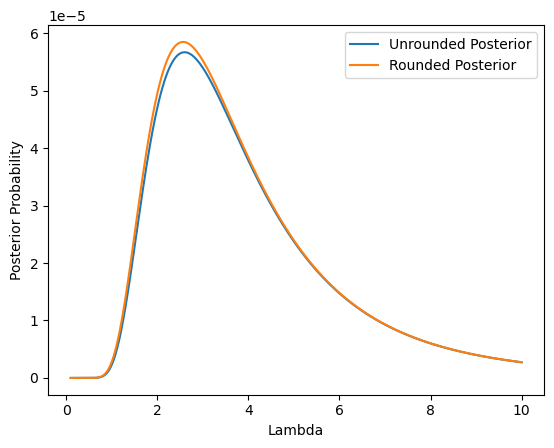

In [221]:
#I put plots together so we could see them on one graph, max aposteriori calucated below
#3a
from scipy.integrate import odeint
dist = np.array([1, 2, 2, 4, 4])
n = len(dist)
lambda_range = np.linspace(0.1, 10, 1000)
unrounded_post = (1/(lambda_range**n))*(np.exp((-np.sum(dist))/lambda_range))

plt.plot(lambda_range, unrounded_post)

#3c

rounded_post = np.ones_like(lambda_range)

for x in dist:
    rounded_post *= (((np.exp(-(x-0.5)/lambda_range))-(np.exp(-(x+0.5)/lambda_range))))

plt.plot(lambda_range, rounded_post)
plt.legend(["Unrounded Posterior", "Rounded Posterior"])
plt.xlabel("Lambda")
plt.ylabel("Posterior Probability")

In [222]:
#3b
MAP_unrounded = (1/n)*(np.sum(dist))
MAP_unrounded
#MAP_unrounded = 2.6

2.6

In [223]:
#3d
from scipy.optimize import fsolve

def log_likelihood(lam):
    log_approx = 0
    for x in dist:
        first_e_term = np.exp(-(x-0.5)/lam)
        sec_e_term = np.exp(-(x+0.5)/lam)
       
        total_term = (1/(first_e_term - sec_e_term))*((((x-0.5)/lam**2)*first_e_term)-(((x+0.5)/lam**2)*sec_e_term))
        
        log_approx += total_term
    return log_approx

initial_guess = 1.0
MAP_rounded = fsolve(log_likelihood, initial_guess)
MAP_rounded

array([2.56762636])